영역처리
convolution
    마스크로 필터링
    
    blurring: 뽀샵처리(회소의 점진적 변화)
    sharping
    
    Edge
        1.차분연산
        2.1차 미분
        3.2차 미분
   
    filterting
        1.
        2.


In [1]:
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]='1'

In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train=X_train.reshape(X_train.shape[0],28,28,1).astype(float)/255
X_test=X_test.reshape(X_test.shape[0],28,28,1).astype(float)/255
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [3]:
model =models.Sequential()
model.add(layers.Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))#모자이크
model.add(layers.Dropout(0.25))#배치마다 랜덤하게 25%를 연결해제
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        


model.add(layers.Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))

1체널=28*28
커널=3*3
bias 32
f(x)=relu
=26*26

(입력수*((커널*커널)+1)*출력수)=파라미터
Flatten=

In [5]:
model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])

In [6]:
eatly_stop = EarlyStopping(monitor='val_loss',patience=10)

history=model.fit(X_train,y_train, epochs=30,batch_size=200,
          validation_split=0.25,callbacks=[eatly_stop])

Epoch 1/30
225/225 [==============================] - 23s 99ms/step - loss: 0.2701 - accuracy: 0.9211 - val_loss: 0.0711 - val_accuracy: 0.9787
Epoch 2/30
225/225 [==============================] - 22s 98ms/step - loss: 0.0724 - accuracy: 0.9772 - val_loss: 0.0538 - val_accuracy: 0.9838
Epoch 3/30
225/225 [==============================] - 24s 106ms/step - loss: 0.0487 - accuracy: 0.9846 - val_loss: 0.0470 - val_accuracy: 0.9862
Epoch 4/30
225/225 [==============================] - 22s 99ms/step - loss: 0.0364 - accuracy: 0.9880 - val_loss: 0.0477 - val_accuracy: 0.9861
Epoch 5/30
225/225 [==============================] - 22s 100ms/step - loss: 0.0288 - accuracy: 0.9906 - val_loss: 0.0492 - val_accuracy: 0.9854
Epoch 6/30
225/225 [==============================] - 23s 102ms/step - loss: 0.0242 - accuracy: 0.9918 - val_loss: 0.0452 - val_accuracy: 0.9865
Epoch 7/30
225/225 [==============================] - 23s 101ms/step - loss: 0.0225 - accuracy: 0.9925 - val_loss: 0.0460 - val_accur

In [7]:
print('Test Accuracy: %.4f'%(model.evaluate(X_test,y_test)[1]))

313/313 [==============================] - 2s 5ms/step - loss: 0.0326 - accuracy: 0.9916
Test Accuracy: 0.9916


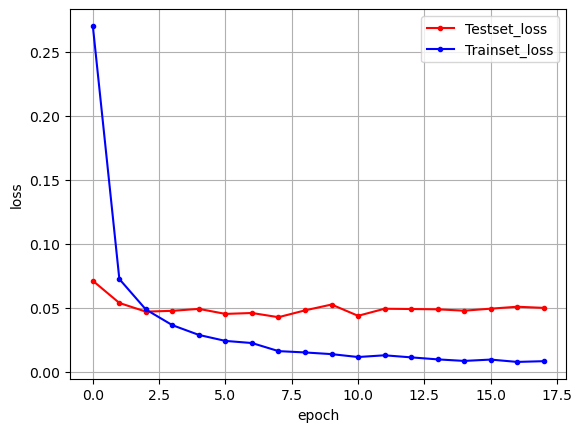

In [8]:
# 검증셋과 학습셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()